# Download clean data set

In [1]:
#libraries
import sklearn
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
diab = pd.read_csv('diabetic_data.csv')
pd.options.mode.chained_assignment = None #supress warnings
# Replace missing values to NaN
diab = diab.replace(to_replace='?',value=np.nan)
diab["race"] = pd.Categorical(diab.race)
diab["code_race"] = diab.race.cat.codes
diab.ix[diab['code_race']== -1, ["code_race"]]=np.nan

from sklearn.preprocessing import Imputer
import numpy as np
imp=Imputer(missing_values="NaN", strategy="most_frequent")
imp.fit(diab[["code_race"]])
diab["code_race"]=imp.transform(diab[["code_race"]]).ravel()

###Imputation gave 2: therefore, we'll replace with caucasians
diab.ix[diab['race'].isnull(),["race"]]="Caucasian"
diab['gender'] = diab['gender'].replace(to_replace='Unknown/Invalid', value='Female')


#create columns
#weight_status
diab['weight_status']=np.nan #empty column
diab['weight_status'][diab['weight'].isnull()] ="Not measured"
diab['weight_status'][diab['weight'].notnull()] ="Measured"
#readmittance
pd.options.mode.chained_assignment = None #supress warnings
diab['readmitted'][diab['readmitted']==">30"]="NO"
diab['readmitted_Group']=np.nan
diab['readmitted_Group'][diab['readmitted']=="NO"]  = 0
diab['readmitted_Group'][diab['readmitted']=="<30"] = 1
diab["readmitted_Group"]=diab["readmitted_Group"].astype('int64')

diab['metformin-rosiglitazoneBinary']=1
diab['metformin-rosiglitazoneBinary'][diab["metformin-rosiglitazone"]=="No"]=0
diab['metformin-pioglitazoneBinary']=1
diab['metformin-pioglitazoneBinary'][diab["metformin-pioglitazone"]=="No"]=0
diab['glimepiride-pioglitazoneBinary']=1
diab['glimepiride-pioglitazoneBinary'][diab["glimepiride-pioglitazone"]=="No"]=0
diab['glipizide-metforminBinary']=1
diab['glipizide-metforminBinary'][diab["glipizide-metformin"]=="No"]=0
diab['glyburide-metforminBinary']=1
diab['glyburide-metforminBinary'][diab["glyburide-metformin"]=="No"]=0
diab['insulinBinary']=1
diab['insulinBinary'][diab["insulin"]=="No"]=0
diab['tolazamideBinary']=1
diab['tolazamideBinary'][diab["tolazamide"]=="No"]=0
diab['troglitazoneBinary']=1
diab['troglitazoneBinary'][diab["troglitazone"]=="No"]=0
diab['miglitolBinary']=1
diab['miglitolBinary'][diab["miglitol"]=="No"]=0
diab['acarboseBinary']=1
diab['acarboseBinary'][diab["acarbose"]=="No"]=0
diab['rosiglitazoneBinary']=1
diab['rosiglitazoneBinary'][diab["rosiglitazone"]=="No"]=0
diab['pioglitazoneBinary']=1
diab['pioglitazoneBinary'][diab["pioglitazone"]=="No"]=0
diab['metforminBinary']=1
diab['metforminBinary'][diab["metformin"]=="No"]=0
diab['repaglinideBinary']=1
diab['repaglinideBinary'][diab["repaglinide"]=="No"]=0
diab['nateglinideBinary']=1
diab['nateglinideBinary'][diab["nateglinide"]=="No"]=0
diab['chlorpropamideBinary']=1
diab['chlorpropamideBinary'][diab["chlorpropamide"]=="No"]=0
diab['glimepirideBinary']=1
diab['glimepirideBinary'][diab["glimepiride"]=="No"]=0
diab['acetohexamideBinary']=1
diab['acetohexamideBinary'][diab["acetohexamide"]=="No"]=0
diab['glipizideBinary']=1
diab['glipizideBinary'][diab["glipizide"]=="No"]=0
diab['glyburideBinary']=1
diab['glyburideBinary'][diab["glyburide"]=="No"]=0
diab['tolbutamideBinary']=1
diab['tolbutamideBinary'][diab["tolbutamide"]=="No"]=0
#let's check if some person takes multiple diabeties managment medications
medication_col=['metforminBinary','repaglinideBinary','nateglinideBinary','chlorpropamideBinary'
                  ,'glimepirideBinary','acetohexamideBinary','glipizideBinary','glyburideBinary','tolbutamideBinary',
                'pioglitazoneBinary','rosiglitazoneBinary','acarboseBinary','miglitolBinary','troglitazoneBinary',
                'tolazamideBinary','insulinBinary','glyburide-metforminBinary','glipizide-metforminBinary',
                'glimepiride-pioglitazone','metformin-rosiglitazoneBinary','metformin-pioglitazoneBinary',
               "glimepiride-pioglitazoneBinary",'metformin-rosiglitazoneBinary','metformin-pioglitazoneBinary']
diab["diab_medications_count"]=np.nan
diab["diab_medications_count"]=diab[medication_col].sum(axis=1)
diab.drop(medication_col,axis=1, inplace = True)
diag_num=["diag_1","diag_2","diag_3"]
#replace diagnosis containing E and V as -1 and -2
diab[diag_num] = diab[diag_num].replace({'E':'-1'}, regex=True)
diab[diag_num] = diab[diag_num].replace({'V':'-2'}, regex=True)

diab[diag_num] = diab[diag_num].astype(np.float)
#bin by diagnosis type
pd.options.mode.chained_assignment = None #supress warnings
#diagnosis 1
diab['diag_1_cat']=np.nan #empty column
diab['diag_1_cat'][(diab['diag_1']>=-2000)&(diab['diag_1']<1)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=280)&(diab['diag_1']<=389)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=630)&(diab['diag_1']<=679)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=740)&(diab['diag_1']<=759)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=1)&(diab['diag_1']<250)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=251)&(diab['diag_1']<280)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=790)&(diab['diag_1']<=799)|((diab['diag_1']==780))|((diab['diag_1']==781))
                  |((diab['diag_1']==784))] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=680)&(diab['diag_1']<=709)|((diab['diag_1']==782))]="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=250)&(diab['diag_1']<251)] ="Diabeties"
diab['diag_1_cat'][(diab['diag_1']>=390)&(diab['diag_1']<=459)|((diab['diag_1']==785))] ="Circulatory"
diab['diag_1_cat'][(diab['diag_1']>=460)&(diab['diag_1']<=519)|((diab['diag_1']==786))] ="Respiratory"
diab['diag_1_cat'][(diab['diag_1']>=520)&(diab['diag_1']<=579)|((diab['diag_1']==787))] ="Digestive"
diab['diag_1_cat'][(diab['diag_1']>=800)&(diab['diag_1']<=999)] ="Injury"
diab['diag_1_cat'][(diab['diag_1']>=710)&(diab['diag_1']<=739)] ="Musculoskeletal"
diab['diag_1_cat'][(diab['diag_1']>=580)&(diab['diag_1']<=629)|((diab['diag_1']==788))] ="Genitourinary"
diab['diag_1_cat'][diab['diag_1'].isnull()] ="No diagnosis"
#diagnosis 2
diab['diag_2_cat']=np.nan #empty column
diab['diag_2_cat'][(diab['diag_2']>=-2000)&(diab['diag_2']<1)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=280)&(diab['diag_2']<=389)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=630)&(diab['diag_2']<=679)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=740)&(diab['diag_2']<=759)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=1)&(diab['diag_2']<250)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=251)&(diab['diag_2']<280)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=790)&(diab['diag_2']<=799)|((diab['diag_2']==780))|((diab['diag_2']==781))
                  |((diab['diag_2']==784))] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=680)&(diab['diag_2']<=709)|((diab['diag_2']==782))]="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=250)&(diab['diag_2']<251)] ="Diabeties"
diab['diag_2_cat'][(diab['diag_2']>=390)&(diab['diag_2']<=459)|((diab['diag_2']==785))] ="Circulatory"
diab['diag_2_cat'][(diab['diag_2']>=460)&(diab['diag_2']<=519)|((diab['diag_2']==786))] ="Respiratory"
diab['diag_2_cat'][(diab['diag_2']>=520)&(diab['diag_2']<=579)|((diab['diag_2']==787))] ="Digestive"
diab['diag_2_cat'][(diab['diag_2']>=800)&(diab['diag_2']<=999)] ="Injury"
diab['diag_2_cat'][(diab['diag_2']>=710)&(diab['diag_2']<=739)] ="Musculoskeletal"
diab['diag_2_cat'][(diab['diag_2']>=580)&(diab['diag_2']<=629)|((diab['diag_2']==788))] ="Genitourinary"
diab['diag_2_cat'][diab['diag_2'].isnull()] ="No diagnosis"
#diagnosis 3
diab['diag_3_cat']=np.nan #empty column
diab['diag_3_cat'][(diab['diag_3']>=-2000)&(diab['diag_3']<1)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=280)&(diab['diag_3']<=389)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=630)&(diab['diag_3']<=679)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=740)&(diab['diag_3']<=759)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=1)&(diab['diag_3']<250)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=251)&(diab['diag_3']<280)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=790)&(diab['diag_3']<=799)|((diab['diag_3']==780))|((diab['diag_3']==781))
                  |((diab['diag_3']==784))] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=680)&(diab['diag_3']<=709)|((diab['diag_3']==782))]="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=250)&(diab['diag_3']<251)] ="Diabeties"
diab['diag_3_cat'][(diab['diag_3']>=390)&(diab['diag_3']<=459)|((diab['diag_3']==785))] ="Circulatory"
diab['diag_3_cat'][(diab['diag_3']>=460)&(diab['diag_3']<=519)|((diab['diag_3']==786))] ="Respiratory"
diab['diag_3_cat'][(diab['diag_3']>=520)&(diab['diag_3']<=579)|((diab['diag_3']==787))] ="Digestive"
diab['diag_3_cat'][(diab['diag_3']>=800)&(diab['diag_3']<=999)] ="Injury"
diab['diag_3_cat'][(diab['diag_3']>=710)&(diab['diag_3']<=739)] ="Musculoskeletal"
diab['diag_3_cat'][(diab['diag_3']>=580)&(diab['diag_3']<=629)|((diab['diag_3']==788))] ="Genitourinary"
diab['diag_3_cat'][diab['diag_3'].isnull()] ="No diagnosis"
#droping original variables
to_drop=['diag_1','diag_2','diag_3']
diab.drop(to_drop,axis=1, inplace = True)

diab["med_cat"]="Other"
diab["med_cat"][(diab["insulin"]=="Up")|(diab["insulin"]=="Down")|(diab["insulin"]=="Steady")]="Insulin"


diab['encounter_id'] = diab['encounter_id'].astype(object)
diab['patient_nbr'] = diab['patient_nbr'].astype(object)
diab['admission_type_id'] = diab['admission_type_id'].astype(object)
diab['discharge_disposition_id'] = diab['discharge_disposition_id'].astype(object)
diab['admission_source_id'] = diab['admission_source_id'].astype(object)
diab['race'] = diab['race'].astype(object)
diab["A1Cresult"] = diab["A1Cresult"].astype(object)
diab["age"] = diab["age"].astype(object)
diab['max_glu_serum'] = diab['max_glu_serum'].astype(object)
diab['gender'] = diab['gender'].astype(object)
diab['diabetesMed'] = diab['diabetesMed'].astype(object)
diab['change'] = diab['change'].astype(object)
# insert dictionary
admission_type_id_dict = {"1" : "Emergency",
"2" : "Urgent",
"3" : "Elective",
"4" : "Newborn",
"5" : "Not Available",
"6" : "NULL",
"7" : "Trauma Center",
"8" : "Not Mapped"}


discharge_disposition_id_dict= {"1" : "Discharged to home",
"2" : "Discharged/transferred to another short term hospital",
"3" : "Discharged/transferred to SNF",
"4" : "Discharged/transferred to ICF",
"5" : "Discharged/transferred to another type of inpatient care institution",
"6" : "Discharged/transferred to home with home health service",
"7" : "Left AMA",
"8" : "Discharged/transferred to home under care of Home IV provider",
"9" : "Admitted as an inpatient to this hospital",
"10" : "Neonate discharged to another hospital for neonatal aftercare",
"11" : "Expired",
"12" : "Still patient or expected to return for outpatient services",
"13" : "Hospice / home",
"14" : "Hospice / medical facility",
"15" : "Discharged/transferred within this institution to Medicare approved swing bed",
"16" : "Discharged/transferred/referred another institution for outpatient services",
"17" : "Discharged/transferred/referred to this institution for outpatient services",
"18" : "NULL",
"19" : "Expired at home. Medicaid only, hospice.",
"20" : "Expired in a medical facility. Medicaid only, hospice.",
"21" : "Expired, place unknown. Medicaid only, hospice.",
"22" : "Discharged/transferred to another rehab fac including rehab units of a hospital .",
"23" : "Discharged/transferred to a long term care hospital.",
"24" : "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
"25" : "Not Mapped",
"26" : "Unknown/Invalid",
"30" : "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
"27" : "Discharged/transferred to a federal health care facility.",
"28" : "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
"29" : "Discharged/transferred to a Critical Access Hospital (CAH)."}


discharge_disposition_id_dict= {"1" : " Physician Referral",
"2" : "Clinic Referral",
"3" : "HMO Referral",
"4" : "Transfer from a hospital",
"5" : " Transfer from a Skilled Nursing Facility (SNF)",
"6" : " Transfer from another health care facility",
"7" : " Emergency Room",
"8" : " Court/Law Enforcement",
"9" : " Not Available",
"10" : " Transfer from critial access hospital",
"11" : "Normal Delivery",
"12" : " Premature Delivery",
"13" : " Sick Baby",
"14" : " Extramural Birth",
"15" : "Not Available",
"17" : "NULL",
"18" : " Transfer From Another Home Health Agency",
"19" : "Readmission to Same Home Health Agency",
"20" : " Not Mapped",
"21" : "Unknown/Invalid",
"22" : " Transfer from hospital inpt/same fac reslt in a sep claim",
"23" : " Born inside this hospital",
"24" : " Born outside this hospital",
"25" : " Transfer from Ambulatory Surgery Center",
"26" : "Transfer from Hospice"}

diab['med_increase']=0
#then make readmittance binary variable
diab['med_increase'][(diab['metformin']=="Up")|(diab['repaglinide']=="Up")|(diab['nateglinide']=="Up")
                    |(diab['metformin-rosiglitazone']=="Up")|(diab['metformin-pioglitazone']=="Up")
                     |(diab['chlorpropamide']=="Up")|(diab['glimepiride']=="Up")
                     |(diab['acetohexamide']=="Up")|(diab['glipizide']=="Up")|(diab['glyburide']=="Up")
                     |(diab['tolbutamide']=="Up")|(diab['pioglitazone']=="Up")|(diab['rosiglitazone']=="Up")
                     |(diab['acarbose']=="Up")|(diab['miglitol']=="Up")|(diab['troglitazone']=="Up")|(diab['tolazamide']=="Up")
                    |(diab['insulin']=="Up")|(diab['glyburide-metformin']=="Up")|(diab['glipizide-metformin']=="Up")] =1
#drop columns
diab.drop(["payer_code"],axis=1, inplace = True)
diab.drop(["medical_specialty"],axis=1, inplace = True)
diab.drop(["examide"],axis=1, inplace = True)
diab.drop(["citoglipton"],axis=1, inplace = True)
diab.drop(['weight'],axis=1, inplace = True)

/Users/johnsonekedum/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


In [3]:
from scipy.stats import boxcox
from sklearn import preprocessing
#transform and normolize some variables
#num_vedications
diab["num_medications"][diab["num_medications"]==0]=0.0001 #add small value to 0
diab["TrNum_medications"]=np.nan #new variable log transformed num_medications
diab["TrNum_medications"]=np.log(diab["num_medications"])
#diab.drop(['num_medications'],axis=1, inplace = True)
#diab_medications_count
diab["diab_medications_count"][diab["diab_medications_count"]==0]=0.0001 #add small value to 0
diab["TrDiab_medications_count"]=np.nan #new variable log transformed num_medications
diab["TrDiab_medications_count"]=np.sqrt(diab["diab_medications_count"])
diab["TrDiab_medications_count"]=preprocessing.scale(diab["TrDiab_medications_count"])
diab.drop(['diab_medications_count'],axis=1, inplace = True)
#num_procedures
diab["num_procedures"][diab["num_procedures"]==0]=0.0001 #add small value to 0
diab["TrNum_procedures"]=np.nan #new variable log transformed num_medications
diab["TrNum_procedures"]=np.sqrt(diab["num_procedures"])
diab["TrNum_procedures"]=preprocessing.scale(diab["TrNum_procedures"])
diab.drop(['num_procedures'],axis=1, inplace = True)
#Number_emergency
diab["TrNumber_emergency"]=np.nan
diab["number_emergency"][diab["number_emergency"]==0]=0.0001
diab["TrNumber_emergency"],_=boxcox(diab["number_emergency"]) #boxcox for transformation and then normalization
diab["TrNumber_emergency"]=preprocessing.scale(diab["TrNumber_emergency"])
diab.drop(['number_emergency'],axis=1, inplace = True)
#number_inpatient
diab["TrNumber_inpatient"]=np.nan
diab["number_inpatient"][diab["number_inpatient"]==0]=0.0001
diab["TrNumber_inpatient"]=np.log10(diab["number_inpatient"])
diab["TrNumber_inpatient"]=preprocessing.scale(diab["TrNumber_inpatient"])
diab.drop(['number_inpatient'],axis=1, inplace = True)
#number_outpatient
diab["TrNumber_outpatient"]=np.nan
diab["number_outpatient"][diab["number_outpatient"]==0]=0.0001
diab["TrNumber_outpatient"]=np.log10(diab["number_outpatient"])
diab["TrNumber_outpatient"]=preprocessing.scale(diab["TrNumber_outpatient"])
diab.drop(['number_outpatient'],axis=1, inplace = True)
#time_in_hospital
diab["TrTime_in_hospital"]=np.nan
diab["time_in_hospital"][diab["time_in_hospital"]==0]=0.0001
diab["TrTime_in_hospital"],_=boxcox(diab["time_in_hospital"])
diab["TrTime_in_hospital"]=preprocessing.scale(diab["TrTime_in_hospital"])
diab.drop(['time_in_hospital'],axis=1, inplace = True)
#number_diagnoses
diab["TrNumber_diagnoses"]=np.nan
diab["number_diagnoses"][diab["number_diagnoses"]==0]=0.0001
diab["TrNumber_diagnoses"],_=boxcox(diab["number_diagnoses"])
diab["TrNumber_diagnoses"]=np.sqrt(diab["TrNumber_diagnoses"])
diab["TrNumber_diagnoses"]=preprocessing.scale(diab["TrNumber_diagnoses"])
diab.drop(['number_diagnoses'],axis=1, inplace = True)
#num_lab_procedures
diab["TrNum_lab_procedures"]=np.nan
diab["TrNum_lab_procedures"]=preprocessing.scale(diab["num_lab_procedures"])
diab.drop(['num_lab_procedures'],axis=1, inplace = True)

/Users/johnsonekedum/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
dummiesList=["med_cat","diag_1_cat","diag_2_cat","diag_3_cat","weight_status","age","gender","race","A1Cresult"]
diab_wDummies = pd.get_dummies(diab[dummiesList])
listToCopy=["TrNum_lab_procedures", "TrNumber_outpatient","TrNumber_emergency", "TrNumber_inpatient", "TrDiab_medications_count",
           "readmitted_Group"]
diab_wDummies= pd.concat((diab_wDummies, diab[listToCopy]), axis=1)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
diab_wDummies.describe()

,med_cat_Insulin,med_cat_Other,diag_1_cat_Circulatory,diag_1_cat_Diabeties,diag_1_cat_Digestive,diag_1_cat_Genitourinary,diag_1_cat_Injury,diag_1_cat_Musculoskeletal,diag_1_cat_Neoplasms,diag_1_cat_No diagnosis,diag_1_cat_Other,diag_1_cat_Respiratory,diag_2_cat_Circulatory,diag_2_cat_Diabeties,diag_2_cat_Digestive,diag_2_cat_Genitourinary,diag_2_cat_Injury,diag_2_cat_Musculoskeletal,diag_2_cat_Neoplasms,diag_2_cat_No diagnosis,diag_2_cat_Other,diag_2_cat_Respiratory,diag_3_cat_Circulatory,diag_3_cat_Diabeties,diag_3_cat_Digestive,diag_3_cat_Genitourinary,diag_3_cat_Injury,diag_3_cat_Musculoskeletal,diag_3_cat_Neoplasms,diag_3_cat_No diagnosis,diag_3_cat_Other,diag_3_cat_Respiratory,weight_status_Measured,weight_status_Not measured,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),gender_Female,gender_Male,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,TrNum_lab_procedures,TrNumber_outpatient,TrNumber_emergency,TrNumber_inpatient,TrDiab_medications_count,readmitted_Group
count,101766.000000,101766.000000,101766.000000,101766.00000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,101766.000000
mean,0.534393,0.465607,0.299088,0.08605,0.093106,0.050282,0.068530,0.048710,0.138121,0.000206,0.068382,0.141727,0.313278,0.125720,0.040976,0.082306,0.023859,0.017334,0.184787,0.003518,0.097557,0.107059,0.297801,0.168593,0.038618,0.065641,0.019122,0.018818,0.175393,0.013983,0.126319,0.072303,0.031415,0.968585,0.001582,0.006790,0.016282,0.037095,0.095169,0.169565,0.220928,0.256156,0.168986,0.027445,0.537616,0.462384,0.188766,0.006299,0.770120,0.020017,0.014799,0.037458,0.080734,0.832773,0.049034,3.243938e-16,1.865722e-13,-1.340213e-13,-5.693088e-15,3.281181e-14,0.111599
std,0.498818,0.498818,0.457861,0.28044,0.290582,0.218527,0.252654,0.215262,0.345028,0.014364,0.252402,0.348772,0.463828,0.331535,0.198236,0.274832,0.152609,0.130513,0.388126,0.059208,0.296716,0.309190,0.457294,0.374394,0.192684,0.247654,0.136956,0.135881,0.380304,0.117421,0.332210,0.258990,0.174438,0.174438,0.039744,0.082122,0.126560,0.188995,0.293450,0.375252,0.414874,0.436511,0.374741,0.163378,0.498586,0.498586,0.391325,0.079115,0.420758,0.140057,0.120747,0.189883,0.272428,0.373180,0.215940,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.314874
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.139630e+00,-4.425121e-01,-3.548828e-01,-7.085570e-01,-1.647646e+00,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [6]:
diab = diab_wDummies
len(diab.columns)
diab.rename(columns={
                 "readmitted_Group":"readmitted","diag_1_cat":"diag1",  
                 "diag_2_cat":"diag2","diag_3_cat":"diag3"
                 }, inplace=True)     
  




# Modeling

In [7]:
# Divide our features into X and Y for modelling 
X= diab.iloc[::,1:60]
#target variable
y = diab["readmitted"]





In [12]:
#import modeling packages

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Split the data into 40% test and 60% training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)




### Random Forest for feature importance

In [13]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [14]:
# Create a list of feature names
feat_labels = X_train.columns.tolist()


In [15]:
# Print the name and gini importance of each feature in our dataset
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('med_cat_Other', 0.017630765280435529)
('diag_1_cat_Circulatory', 0.018735999913462434)
('diag_1_cat_Diabeties', 0.0096522424248557913)
('diag_1_cat_Digestive', 0.010972351451052605)
('diag_1_cat_Genitourinary', 0.0088762674590976351)
('diag_1_cat_Injury', 0.0097748705664671646)
('diag_1_cat_Musculoskeletal', 0.0074322555773340014)
('diag_1_cat_Neoplasms', 0.015321197030311658)
('diag_1_cat_No diagnosis', 0.00033916790375424551)
('diag_1_cat_Other', 0.010632856332730862)
('diag_1_cat_Respiratory', 0.012274347014626612)
('diag_2_cat_Circulatory', 0.02195609733581106)
('diag_2_cat_Diabeties', 0.014016426022353151)
('diag_2_cat_Digestive', 0.0077257135187246999)
('diag_2_cat_Genitourinary', 0.013004819122428499)
('diag_2_cat_Injury', 0.0058572984057996191)
('diag_2_cat_Musculoskeletal', 0.0043762996558169348)
('diag_2_cat_Neoplasms', 0.017211825458300412)
('diag_2_cat_No diagnosis', 0.00083891331517974347)
('diag_2_cat_Other', 0.013181409931058123)
('diag_2_cat_Respiratory', 0.0140001303

In [16]:
# Create a selector object that will use the random forest classifier to identify
# select features that have an importance of more than 0.01
sfm = SelectFromModel(clf, threshold=0.01)


# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
        prefit=False, threshold=0.01)

In [17]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

med_cat_Other
diag_1_cat_Circulatory
diag_1_cat_Digestive
diag_1_cat_Neoplasms
diag_1_cat_Other
diag_1_cat_Respiratory
diag_2_cat_Circulatory
diag_2_cat_Diabeties
diag_2_cat_Genitourinary
diag_2_cat_Neoplasms
diag_2_cat_Other
diag_2_cat_Respiratory
diag_3_cat_Circulatory
diag_3_cat_Diabeties
diag_3_cat_Genitourinary
diag_3_cat_Neoplasms
diag_3_cat_Other
diag_3_cat_Respiratory
age_[40-50)
age_[50-60)
age_[60-70)
age_[70-80)
age_[80-90)
gender_Female
gender_Male
race_AfricanAmerican
race_Caucasian
A1Cresult_None
TrNum_lab_procedures
TrNumber_outpatient
TrNumber_emergency
TrNumber_inpatient
TrDiab_medications_count


In [21]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

###  Random forest modeling

In [23]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=5000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [24]:
# Lets apply our Featured Classifier To The Test Dataset
y_important_pred = clf_important.predict(X_important_test)



In [25]:
# View The Accuracy Of Our  Model
accuracy_score(y_test, y_important_pred)

0.88201046503058445

In [68]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_important_pred)

array([[35819,   354],
       [ 4449,    85]])

In [44]:
#create a classification report
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.classification_report(y_test, y_important_pred))

             precision    recall  f1-score   support

          0       0.89      0.99      0.94     36173
          1       0.19      0.02      0.03      4534

avg / total       0.81      0.88      0.84     40707



[[35819   354]
 [ 4449    85]]


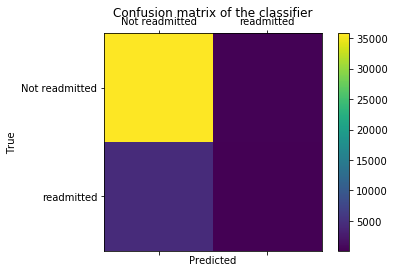

In [67]:
# Graph confusion Matrix

labels = ['Not readmitted', 'readmitted']
matrix_c = confusion_matrix(y_test, y_important_pred)
print(matrix_c)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix_c)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()